# CMSC320 - Final Tutorial
# The Analysis of King County House Sales

## Author: Haitian Hao

<center><h1>
Introduction
</h1></center>

Housing is one of the basic needs in people's daily life, especially for those who live in popular city with large population. For the young people who just arrived at major cities, renting an apartment is usually a good choice, but sooner or later, they have to purchase a home of their very own. Seattle, is a major city holding almost 4 million people. Seattle has been undergoing a population boom over the last decade and, according to recent Census data, it had the 14th largest population increase in the country. By 2040, the larger Seattle area is expected to grow by 1.7 million people, with a total of 782,00 in Seattle proper by 2040. Seattle has struggled with its population growth, and it has experienced trouble creating space for more residents.

King County is a county surrounding Seattle located in the U.S. state of Washington. It provides affordable housing with considerate quality. Living in King County is not only a budget but a real convenience for people who work and socialize in Seattle. House prices at King county are important and valuable data for those who plan to live there. That is why I decided to analyze the related dataset and construct a prediction model to predict future house price based on other measurable indicants.

The data I used in this tutorial is named "House Sales in King County, USA", it is a csv file from Kaggle: "kc_house_data.csv". To start with, I checked the completeness of the dataset and converted some data into the correct type.

In [2]:
import pandas as pd
import numpy as np
from numpy import *
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from scipy.interpolate import *
from scipy.stats import *
import seaborn as sns
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error as mse
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

## 1. Data collection and processing

Convert data from int type to float type for a more precise future caculation. It turns out that db(the dataset) has more than 21000 observations and 21 columns. This is a large dataset with quite a lot potential predictors of the house price. To attain a predicting model with less errors, we need to get rid of attributes that are not affecting the price much.

In [3]:
db = pd.read_csv('kc_house_data.csv')
db.bedrooms = db.bedrooms.astype('float')
db.sqft_living = db.sqft_living.astype('float')
db.sqft_lot = db.sqft_lot.astype('float')
db.view = db.view.astype('float')
db.condition = db.condition.astype('float')
db.grade = db.grade.astype('float')
db.sqft_above = db.sqft_above.astype('float')
db.sqft_basement = db.sqft_basement.astype('float')
db

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0.0,...,7.0,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0.0,...,7.0,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0.0,...,6.0,770.0,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0.0,...,7.0,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0.0,...,8.0,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0,0.0,...,11.0,3890.0,1530.0,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715.0,6819.0,2.0,0,0.0,...,7.0,1715.0,0.0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060.0,9711.0,1.0,0,0.0,...,7.0,1060.0,0.0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780.0,7470.0,1.0,0,0.0,...,7.0,1050.0,730.0,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890.0,6560.0,2.0,0,0.0,...,7.0,1890.0,0.0,2003,0,98038,47.3684,-122.031,2390,7570


There is no null data found, which is quite surprising. The data is inclusive and complete.

In [4]:
db.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

To get myself familiar with the dataset, I sorted the price and displayed the top 10 highest house price. The pattern I noticed is they all have 4 to 6 bedrooms and aroundor more than 5 bathrooms, half of them possess a waterfront and most of them have been viewed for multiple times. They are most likely to be villas, and all have a high grade.

In [5]:
df_top = db.sort_values('price', ascending=False)
df_top.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6.0,8.00,12050.0,27600.0,2.5,0,3.0,...,13.0,8570.0,3480.0,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5.0,4.50,10040.0,37325.0,2.0,1,2.0,...,11.0,7680.0,2360.0,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6.0,7.75,9890.0,31374.0,2.0,0,4.0,...,13.0,8860.0,1030.0,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5.0,5.75,9200.0,35069.0,2.0,0,0.0,...,13.0,6200.0,3000.0,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5.0,5.00,8000.0,23985.0,2.0,0,4.0,...,12.0,6720.0,1280.0,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6.0,6.00,7390.0,24829.0,2.0,1,4.0,...,12.0,5000.0,2390.0,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5.0,5.25,8010.0,45517.0,2.0,1,4.0,...,12.0,5990.0,2020.0,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5.0,6.75,9640.0,13068.0,1.0,1,4.0,...,12.0,4820.0,4820.0,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5.0,5.50,6640.0,40014.0,2.0,1,4.0,...,12.0,6350.0,290.0,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4.0,3.00,6430.0,27517.0,2.0,0,0.0,...,12.0,6430.0,0.0,2001,0,98004,47.6208,-122.219,3720,14592


## 2. Exploratory analysis & Data visualization

Here is a scatter plot of the house price distribution over time. We can see that the distributions on each vertical line are similar, not to mention that the total time range is short, only 15 months. I will not consider date as a predictor.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


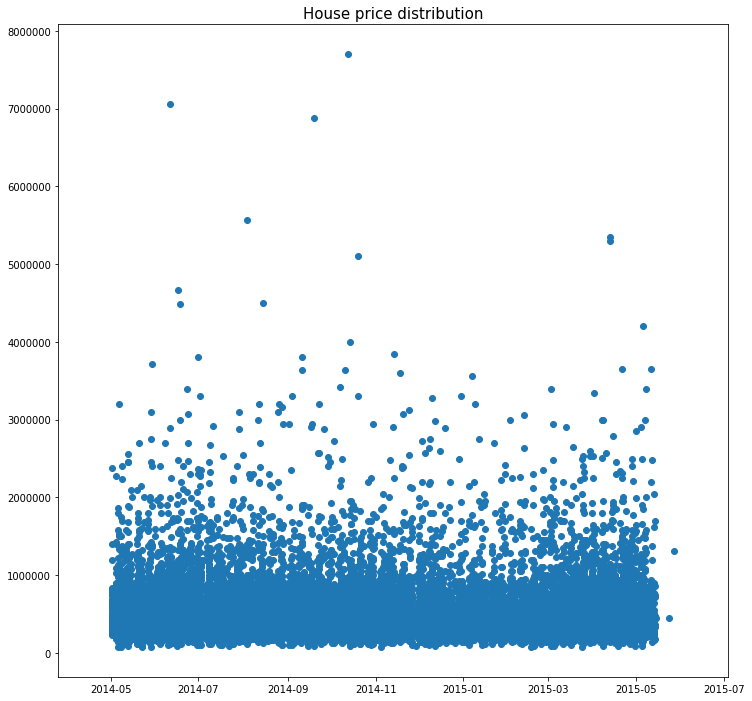

In [6]:
db.date = pd.to_datetime(db.loc[:, 'date'])
figure(figsize=(12,12))
scatter(db.date, db.price)
title('House price distribution', fontsize=15)
show()

Next, I plotted price vs. living area and graph vs. lot area. There appears to be a linear-ish relation in the first graph. But when I plotted a linear regression line, the r-squared value 0.493 is low and the fitting is not good. R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as 
the coefficient of determination, or the coefficient of multiple determination for multiple regression. In general, the higher the R-squared, the better the model fits the data. The price vs. lot area shows no relation at all, we can only observe that most data have a lot area value less than 500,000 and a price value less than 2,000,000.

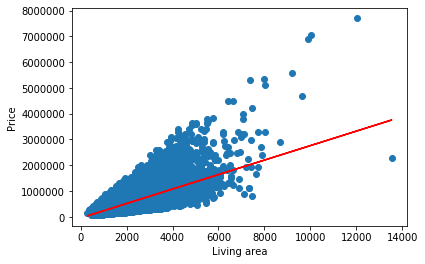

The R squared value of the fitting above is 0.4928532179037934.





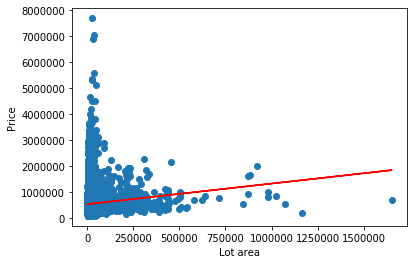

In [7]:
xlabel('Living area')
ylabel('Price')
scatter(db.sqft_living, db.price)
l1 = polyfit(db.sqft_living, db.price, 1)
plot(db.sqft_living, polyval(l1, db.sqft_living), 'r-')
show()

slope, intercept, r, p, std_err = linregress(db.sqft_living, db.price)
print('The R squared value of the fitting above is ' + str(pow(r,2)) + '.\n\n\n')

xlabel('Lot area')
ylabel('Price')
scatter(db.sqft_lot, db.price)
l2 = polyfit(db.sqft_lot, db.price, 1)
plot(db.sqft_lot, polyval(l2, db.sqft_lot), 'r-')
show()

The floor area ratio (FAR) is the relationship between the total amount of usable floor area that a building has, or has been permitted to have and the total area of the lot on which the building stands. The ratio is determined by dividing the total or gross floor area of the building by the gross area of the lot. A higher ratio is more likely to indicate a dense or urban construction.

The plot shows that most data have a FAR of 0 - 2 and a house price of 0 - 2,000,000. I tried to examine the relation between the price and the FAR value. I plotted a linear fitting line and a cubic fitting line. The fittings are unprecise and r-squared is low. There is no such relation between the price and FAR.

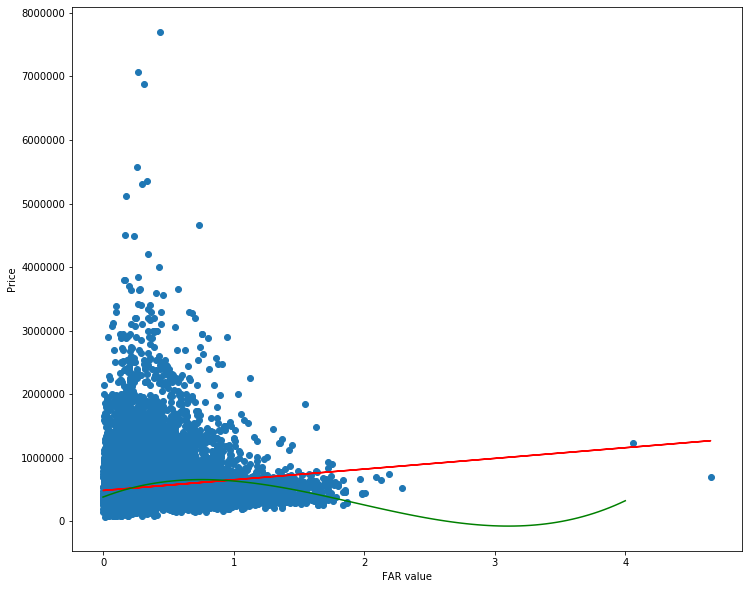

The R squared value of the linear fitting above is 0.015157287420172694.



In [8]:
far = db.sqft_living/db.sqft_lot
plt.figure(figsize=(12,10))
plt.xlabel('FAR value')
plt.ylabel('Price')
plt.scatter(far, db.price)

l3 = np.polyfit(far, db.price, 1)
plt.plot(far, polyval(l3,far), 'r-')

xp = linspace(0, 4, 100)
l4 = np.polyfit(far, db.price, 3)
plt.plot(xp, polyval(l4,xp), 'g-')

plt.show()

slope, intercept, r, p, std_err = linregress(far, db.price)
print('The R squared value of the linear fitting above is ' + str(pow(r,2)) + '.\n')

The histogram of the price shows its distribution which looks similar to a normal distribution. The data is skewed right, the mean is greater than the median, and both are closed to the peak. The skewness of the data is 4.024, which is significantly high.

Statistical data of the house price:

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


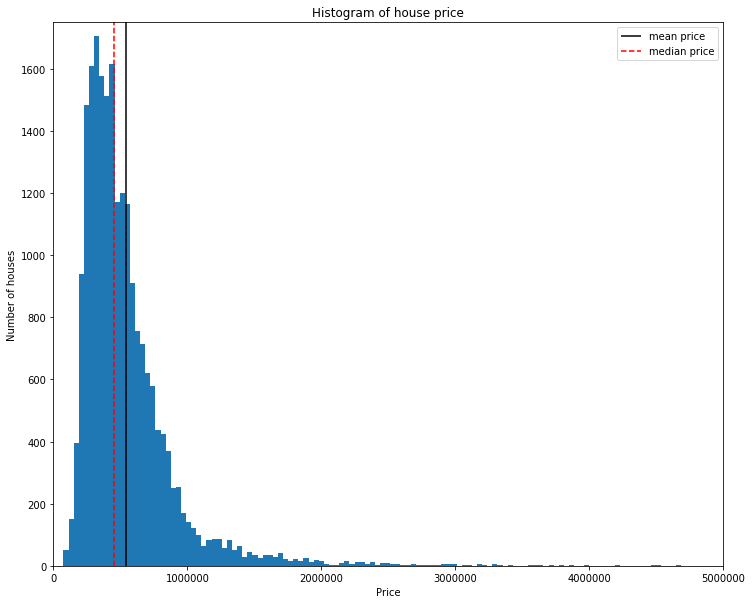

Skewness: 4.024069144684712


In [9]:
mean_price = db.price.mean()
median_price = db.price.median()
min_price = db.price.min()
max_price = db.price.max()
print('Statistical data of the house price:\n')
print(db.price.describe())

figure(figsize=(12,10))
title('Histogram of house price')
xlim(0,5000000)
ylim(0,1750)
xlabel('Price')
ylabel('Number of houses')
hist(db.price, bins = 200)
vlines(mean_price, 0, 2000, color='black', label='mean price', linewidth=1.5)
vlines(median_price, 0, 2000, color='red',label='median price', linewidth=1.5, linestyles='--')
legend()
show()

print('Skewness: '+str(db.price.skew()))

In my common sense, the number of bedrooms reflects how many rooms and how big the house is, thus reflects how expensive the house could be. I used a bar chart to show the relation. It turns out that houses with 8 bedrooms has a highest mean price which is over 1,000,000. However, the box chart could not show the number of observations behind each bar. As a matter of fact, the count table shows that the cases of 0, 7, 8, 9, 10, 11, 33 bedrooms have lower than 40 observations. Once I got rid of those with a few observations, the new bar chart shows a linearly increasing relation between the price and the number of bedrooms.

To display the distribution and the size of each observation, I plotted a violin plot. It clearly shows there is not sufficient data for the cases when bedrooms = 11 and bedrooms = 33.

Statistical data of the number of bedrooms:

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


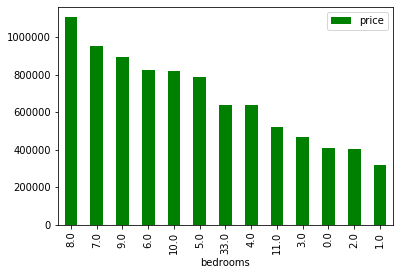

          Count
bedrooms       
3.0        9824
4.0        6882
2.0        2760
5.0        1601
6.0         272
1.0         199
7.0          38
8.0          13
0.0          13
9.0           6
10.0          3
33.0          1
11.0          1


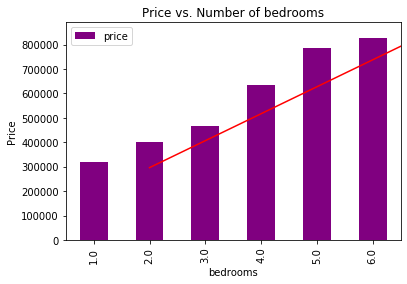

In [10]:
# Examine the relation between house price and number of bedrooms
print('Statistical data of the number of bedrooms:\n')
print(db.bedrooms.describe())

df_bedrooms = db.groupby('bedrooms').mean()['price'].sort_values(ascending=False)
df_bedrooms.plot(kind='bar', color='green')
legend()
show()

df_bedrooms_num = db.groupby('bedrooms').count().id.sort_values(ascending=False)
print(pd.DataFrame(df_bedrooms_num).rename(columns={'id':'Count'}))
# The table shows that the number of some numbers of bedrooms are so low that they need to be dropped

df_bedrooms_dropped = df_bedrooms.drop({7.0, 8.0, 0.0, 9.0, 10.0, 33.0, 11.0}).sort_values()
df_bedrooms_dropped.plot(kind='bar', color='purple')
ylabel('Price')
title('Price vs. Number of bedrooms')
legend()
# The bar plot shows a linear relation, as number of bedrooms increases, the price goes up.
l5 = np.polyfit(df_bedrooms_dropped.index,
                df_bedrooms_dropped.values, 1)
plt.plot(df_bedrooms_dropped.index,
         polyval(l5,df_bedrooms_dropped.index), 'r-')
show()

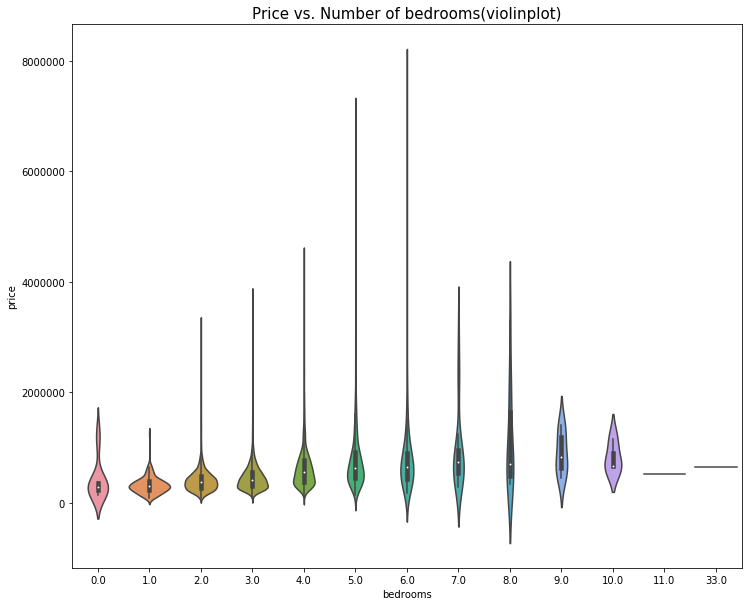

In [11]:
figure(figsize=(12,10))
sns.violinplot(x='bedrooms', y='price', data=db)
title('Price vs. Number of bedrooms(violinplot)', fontsize=15)
show()

I chose several attributes that I was interested in and I assumed could be the predictors and plotted the relation between price and each of them. Basically, the price is increasing as the attributes increase. The Price vs. Grade plot shows a clear positive relation, which makes sense since the grade is an overall feature that involves all partial attributes and reflects a general quality. The price, certainly, is also a general reflection of the quality of the house. The two values are supposed to strongly and positively correlated.

The condition, however, is not a predictor as strong as the grade. In fact, when the condition is greater than 3, both price and the grade stop increasing and remain stable. This is actually different from what I previously assumed, since I always considered the condition of a house as one of the most important indexes. Also, there are a bunch of outliers in both graphs when condition is greater than 3.

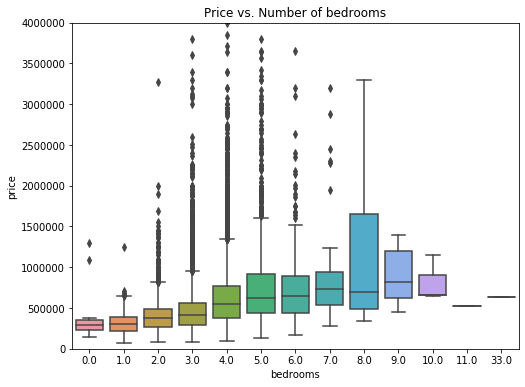

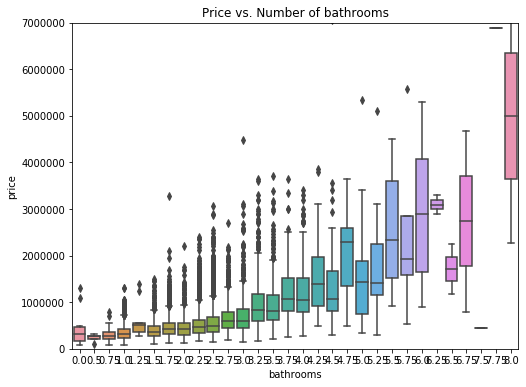

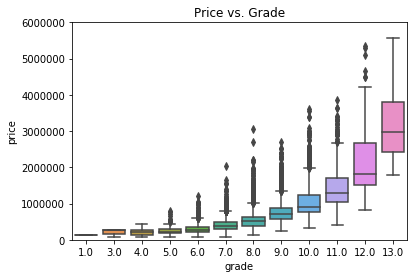

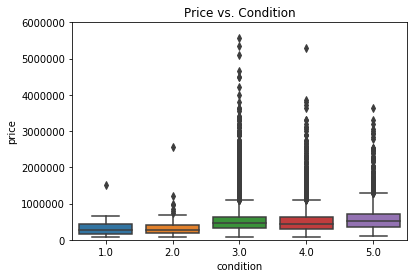

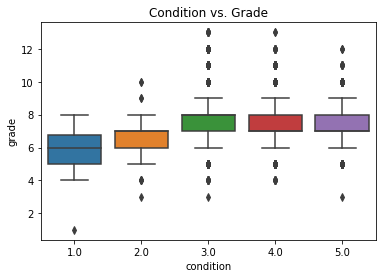

In [12]:
figure(figsize=(8,6))
sns.boxplot(x='bedrooms', y='price', data=db[['bedrooms','price']])
ylim(0,4000000)
title('Price vs. Number of bedrooms')
show()

figure(figsize=(8,6))
sns.boxplot(x='bathrooms', y='price', data=db[['bathrooms','price']])
ylim(0,7000000)
title('Price vs. Number of bathrooms')
show()

sns.boxplot(x='grade', y='price', data=db[['grade','price']])
ylim(0,6000000)
title('Price vs. Grade')
show()

sns.boxplot(x='condition', y='price', data=db[['condition','price']])
ylim(0,6000000)
title('Price vs. Condition')
show()

sns.boxplot(x='condition', y='grade', data=db[['condition','grade']])
# ylim(0,6000000)
title('Condition vs. Grade')
show()

The correlation matrix tells how strong the correlation is within each pair of attributes. The deeper the blue color of the unit box is, the stronger the positive correlation woule be. We can see that bathrooms, sqft_living, view, grade, sqft_above all quite strongly correlated with the house price. Some fun observations here: house condition has almost no correlation with the price, and latitude has as strong correlation as the number of bedrooms does with the house price.

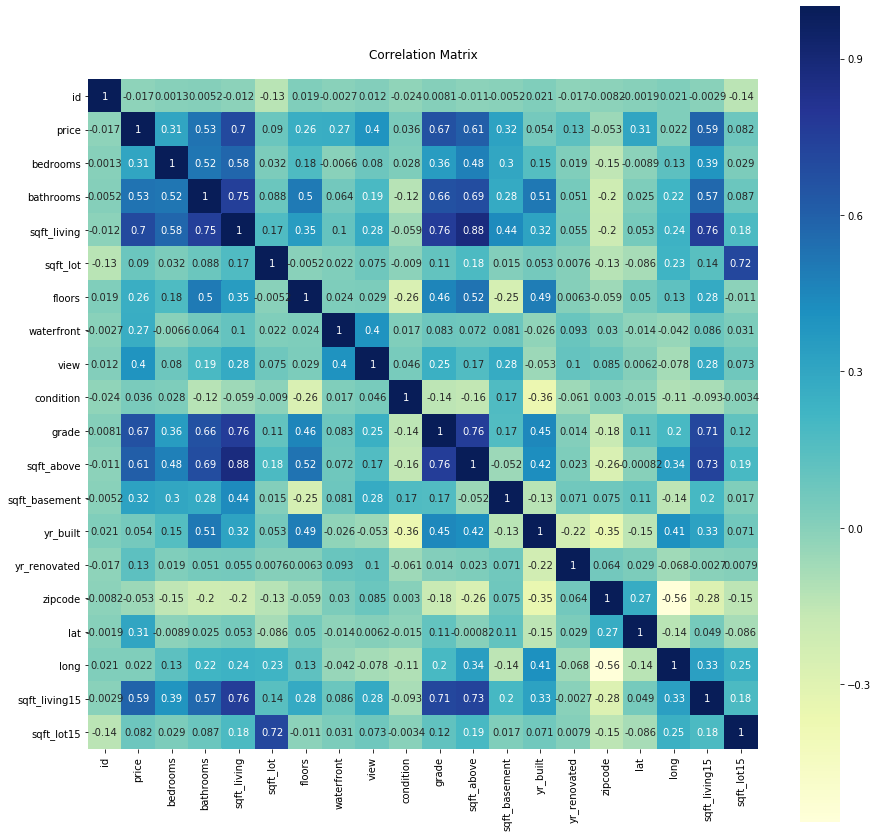

In [13]:
figure(figsize=(15,15))
sns.heatmap(db.corr(), square=True, annot=True, cmap="YlGnBu")
title('Correlation Matrix\n')
show()

The table shows how strong each factor correlates to the house price.

In [14]:
df_corr = db.corr()[['price']]
df_corr

,price
id,-0.016762
price,1.000000
bedrooms,0.308350
bathrooms,0.525138
sqft_living,0.702035
sqft_lot,0.089661
floors,0.256794
waterfront,0.266369
view,0.397293
condition,0.036362


## 3. Data analysis & Machine learning

Now that I've had a general idea about the data, I started building my prediction model. This part is made up of five parts:

1. Seperate testing set from the dataset
2. Determine my predictors
3. Compare models to find the best one
4. Train the model with the training set
5. Show and graph the performance of the selected model fitting the testing set

To begin with, I splitted the data into testing set and the rest. I am trying to simulate a real-life situation where I need to make predictions on unknown prices with my model. Since I don't have new observations in real life, I need to pretend that I have ones by treating part of the whole data as new observations that I am going to predict on. The model construction would be based on the rest of the data. 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(db.drop(['price'], axis = 1), db.price, test_size=0.2)
X_train = X_train.drop(['id', 'date', 'yr_renovated', 'zipcode'], axis = 1)
X_test = X_test.drop(['id', 'date', 'yr_renovated', 'zipcode'], axis = 1)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
13389,4.0,3.25,2557.0,9480.0,2.0,0,2.0,3.0,7.0,2557.0,0.0,1948,47.5449,-122.262,2220,8340
1689,2.0,2.50,1140.0,1181.0,3.0,0,0.0,3.0,8.0,1140.0,0.0,2007,47.6713,-122.383,1220,1189
1660,8.0,5.00,2800.0,2580.0,2.0,0,0.0,3.0,8.0,1880.0,920.0,1997,47.6086,-122.303,1800,2580
2719,4.0,2.75,2140.0,9920.0,2.0,0,0.0,3.0,8.0,2140.0,0.0,1993,47.3529,-122.274,2130,9920
8345,3.0,2.00,2350.0,6000.0,1.5,0,0.0,4.0,8.0,1990.0,360.0,1922,47.6476,-122.320,2010,5040


First we need to determine which attributes could be predictors, this is done by using the OLS function from statsmodels.api. The OLS table gives p-values of each factor, whichever has a p-value less than 0.05 shall be kept as predictors for my model. The rests are dumped.

It turns out that only sqft_lot shall be discarded. This is not a satisfying result, for it means there are more predictors in the model that will bring a high variance.

In [16]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                          1.028e+04
Date:                Sat, 20 Jul 2019   Prob (F-statistic):                        0.00
Time:                        13:07:42   Log-Likelihood:                     -2.3625e+05
No. Observations:               17290   AIC:                                  4.725e+05
Df Residuals:                   17275   BIC:                                  4.726e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.867e+04   2164.144    -17.870      0.000   -4.29e+04   -3.44e+04
bathrooms      4.932e+04   3734.296     13.206      0.000     4.2e+04    5.66e+04
sqft_living     108.8684      2.617     41.596      0.000     103.738     113.999
sqft_lot         -0.0225      0.059     -0.382      0.703      -0.138       0.093
floors         1.376e+04   4073.484      3.378      0.001    5775.859    2.17e+04
waterfront     6.053e+05   2.05e+04     29.595      0.000    5.65e+05    6.45e+05
view           4.906e+04   2467.833     19.879      0.000    4.42e+04    5.39e+04
condition      2.388e+04   2644.478      9.030      0.000    1.87e+04    2.91e+04
grade          1.094e+05   2430.463     45.021      0.000    1.05e+05    1.14e+05
sqft_above       60.6499      2.543     23.845      0.000      55.664      65.635
sqft_basement    48.2185      2.999     16.079      0.000      42.340      54.097
yr_built      -3319.9260     70.051    -47.393      0.000   -3457.232   -3182.620
lat             4.84e+05   1.15e+04     42.118      0.000    4.62e+05    5.07e+05
long            1.41e+05   4690.191     30.066      0.000    1.32e+05     1.5e+05
sqft_living15    12.9271      3.898      3.316      0.001       5.287      20.567
sqft_lot15       -0.5146      0.085     -6.032      0.000      -0.682      -0.347
==============================================================================
Omnibus:                    15275.888   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1680970.778
Skew:                           3.773   Prob(JB):                         0.00
Kurtosis:                      50.712   Cond. No.                     1.01e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
X_train = X_train.drop(['sqft_lot'], axis = 1)
X_test = X_test.drop(['sqft_lot'], axis = 1)
X_train.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
13389,4.0,3.25,2557.0,2.0,0,2.0,3.0,7.0,2557.0,0.0,1948,47.5449,-122.262,2220,8340
1689,2.0,2.50,1140.0,3.0,0,0.0,3.0,8.0,1140.0,0.0,2007,47.6713,-122.383,1220,1189
1660,8.0,5.00,2800.0,2.0,0,0.0,3.0,8.0,1880.0,920.0,1997,47.6086,-122.303,1800,2580
2719,4.0,2.75,2140.0,2.0,0,0.0,3.0,8.0,2140.0,0.0,1993,47.3529,-122.274,2130,9920
8345,3.0,2.00,2350.0,1.5,0,0.0,4.0,8.0,1990.0,360.0,1922,47.6476,-122.320,2010,5040


Since we have determined the predictors, we can find out the score of each model's performance when they are used to fit the predictors and responses. The function that helps here is cross_val_score, and the method used is k-fold cross validation, with k = 10.

First test out the linear model, the cross validation score 0.696 is the mean of 10 scores. The cv score of linear regression model is not high. To make it more sensible, we can visualize the performance by plotting the prediction values vs. the actual values. Here we need the testing set previously seperated from the dataset. What we expected to see is all the points staying on the y = x line or being not far from the line.

In [18]:
cross_val_score(lm.LinearRegression(), X_train, y_train, cv = 10).mean()

0.6895853784503021

The score attained from applying this model to the test dataset: 0.712601166104335


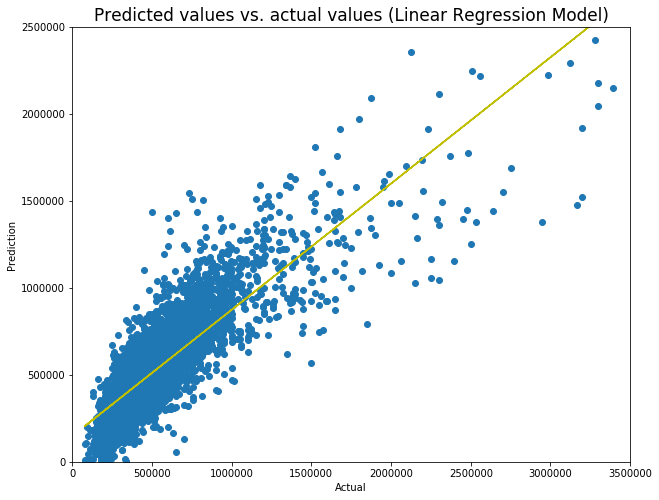

In [19]:
# Plot the prediction vs. actual values plot using linear regression model
model = lm.LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score_linreg = model.score(X_test, y_test)
print('The score attained from applying this model to the test dataset: ' + str(score_linreg))

figure(figsize=(10,8))
title('Predicted values vs. actual values (Linear Regression Model)', fontsize=17)
xlabel('Actual')
ylabel('Prediction')
ylim(0,2500000)
xlim(0, 3500000)
scatter(y_test, predictions)

l6 = polyfit(y_test, predictions, 1)
plot(y_test, polyval(l6, y_test), 'y--')

show()

Repeat the same procedure on SVM and Lasso. The performances are not satisfying as well.

In [20]:
# Test the SVM model
cross_val_score(SVC(gamma='auto'), X_train.head(2000), y_train.head(2000), cv=5).mean()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.016345004432181225

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77988422468574.56, tolerance: 213088805227.50375
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76197413810281.06, tolerance: 210465049162.61163
  positive)


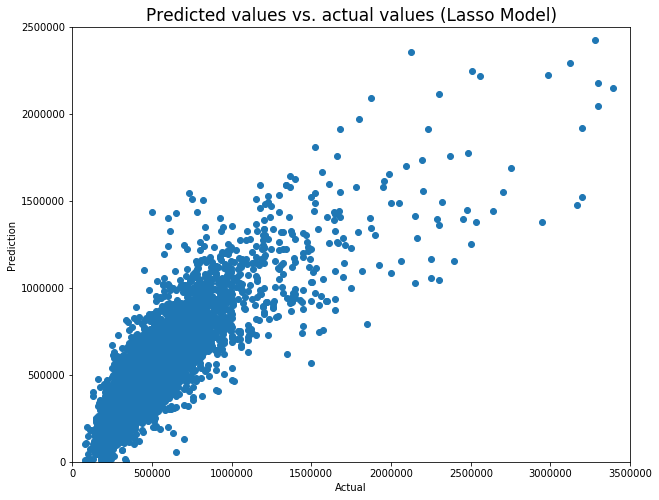

The score attained from applying this model to the test dataset: 0.7126027310298371


In [21]:
# Test the Lasso model
cross_val_score(Lasso(), X_train, y_train, cv=10).mean()

model = Lasso()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

figure(figsize=(10,8))
title('Predicted values vs. actual values (Lasso Model)', fontsize=17)
xlabel('Actual')
ylabel('Prediction')
ylim(0,2500000)
xlim(0, 3500000)
scatter(y_test, predictions)
show()
print('The score attained from applying this model to the test dataset: ' + str(model.score(X_test, y_test)))


My guess is the poynomial model might fit better here, let's test it out with different degrees.

In [22]:
# Test the polynomial model
scorelist = []
for i in range(0,4):
    poly = PolynomialFeatures(i)
    df_poly = poly.fit_transform(X_train)
    cv_score = cross_val_score(lm.LinearRegression(), df_poly, y_train, cv=10).mean()
    print(i, cv_score)
    scorelist.append(cv_score)

0 -0.0006340174798622478
1 0.6895853784503067
2 0.7933629033141095
3 0.267570223931788


As is shown, the quadratic regression had the highest cv score. In this case, this is our final model for future use of predictions. Plot the predictions vs. actual values too see the performance.

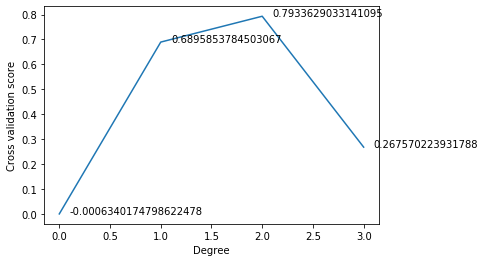

In [23]:
xlabel('Degree')
ylabel('Cross validation score')
plot(scorelist)
for i in range(0, len(scorelist)):
    annotate(str(scorelist[i]), xy=(i + 0.1, scorelist[i]))
show()

The score attained from applying this model to the test dataset: 0.8103633540737685


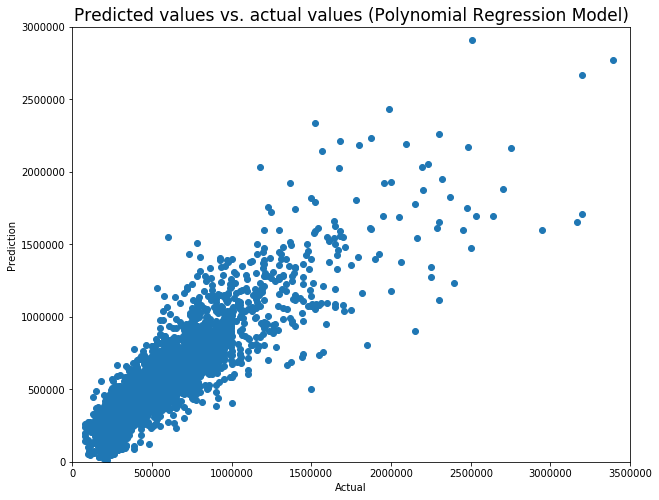

In [24]:
model = lm.LinearRegression()
poly = PolynomialFeatures(2)
df_poly_xtrain = poly.fit_transform(X_train)
model.fit(df_poly_xtrain, y_train)

df_poly_xtest = poly.fit_transform(X_test)
predictions = model.predict(df_poly_xtest)
score_poly = model.score(df_poly_xtest, y_test)
print('The score attained from applying this model to the test dataset: ' + str(score_poly))

figure(figsize=(10,8))
title('Predicted values vs. actual values (Polynomial Regression Model)', fontsize=17)
xlabel('Actual')
ylabel('Prediction')
ylim(0, 3000000)
xlim(0, 3500000)
scatter(y_test, predictions)

show()

The fitting score is 0.81. Though it is not very high, it is the highest score so far. The final decision is a quadratic model.

## 4. Conclusion

The house price is dependent on multiple predictors. The relation is quite complicated and we may have to take most of the attributes into account. The numbers of bathrooms and bedrooms and the living area all correlate quite strongly and positively with the house price. The condition turns out to be a weak predictor. The grade is definitely a strong one, for it is more general compared to other attributes.

Compared to the performance of linear regression model, the polynomial model performs much better. However, a high-degree polynomial model might overfit the data and that will give us a low MSE value on the training set but a high MSE value on unseen, unknow dataset. Since our ultimate goal is to make predictions on the unseen data, we need to find the number of degree that achieves the perfect balance.

For further exploration, we could repeat the splitting process at the beginning of part 3 to train a quadratic regression model multiple times. Once I've learnt more models or have got more new data, I will update the outcomes.